In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

c:\Users\squid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
# read csv data
data1 = pd.read_csv('./data/csv/mbti_1.csv')
data2 = pd.read_csv('./data/csv/MBTI_500.csv')
datas = data1

In [3]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [4]:
train_data,test_data=train_test_split(datas,test_size=0.2,random_state=42,stratify=datas.type)

In [5]:
train_data.posts,train_length=clear_text(train_data)

100%|██████████| 6940/6940 [00:02<00:00, 2512.67it/s]


In [6]:
test_data.posts,test_length=clear_text(test_data)

100%|██████████| 1735/1735 [00:00<00:00, 2575.77it/s]


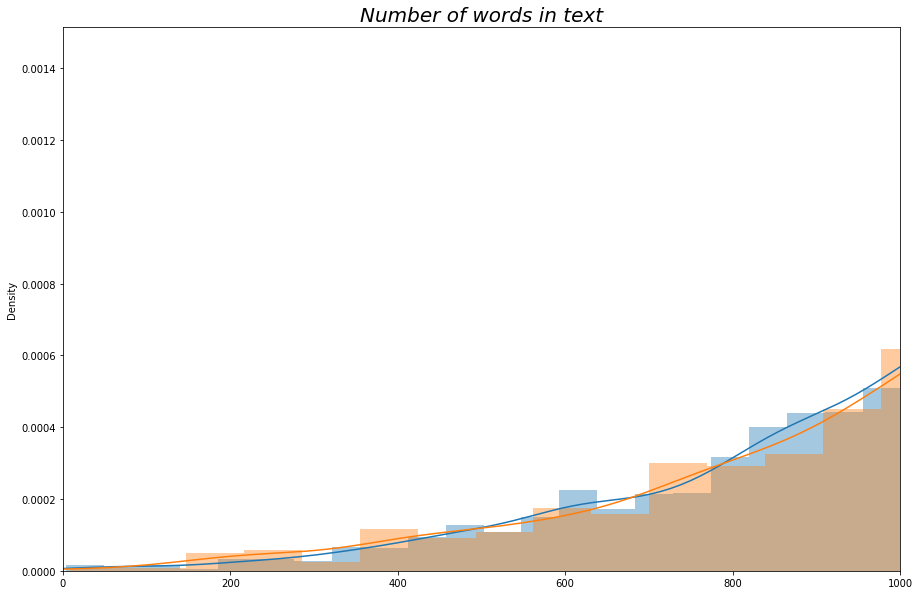

In [7]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.xlim(00, 1000)
plt.show()

In [8]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)

train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [9]:
# SVC
model_svc=SVC()
model_svc.fit(train_post, train_target)

SVC()

In [10]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.86      0.91       152
        ENFP       0.96      0.96      0.96       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.95      0.96      0.96       548
        ESFJ       1.00      0.58      0.73        33
        ESFP       1.00      0.37      0.54        38
        ESTJ       1.00      0.52      0.68        31
        ESTP       1.00      0.83      0.91        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.93      0.98      0.96      1466
        INTJ       0.96      0.97      0.96       873
        INTP       0.95      0.98      0.96      1043
        ISFJ       1.00      0.88      0.94       133
        ISFP       0.97      0.90      0.94       217
        ISTJ       0.94      0.91      0.93       164
        ISTP       0.98      0.93      0.95       270

    accuracy                           0.95      